<div class="alert alert-info">
Заказчик этого исследования — Министерство культуры Российской Федерации.
<br>
Нам нужно изучить рынок российского кинопроката и выявить текущие тренды. И нам нужно уделить внимание фильмам, которые получили государственную поддержку.
<br>
У нас есть пара датасетов
<br>
Первый это данные о проктных удостоверениях
<br>
Второй это данные о прокате в Российских кинотеатрах
<br>
Нам нужно изучить эти датасеты, найти (если есть ошибки), провести предоработку данных, а также нам нужно добавить свои категориальные переменные, чтобы с их помощью найти какие-нибудь закономерности и интересные детали
</div>

## Исследование данных о российском кинопрокате



### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

<div class="alert alert-info">
Импортируем библиотеки
</div>

In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

<div class="alert alert-info">
Откроем первый датасет и посмотрим на него внимательно
</div>

In [2]:
data_one = pd.read_csv('/datasets/mkrf_movies.csv')
display(data_one.head())
display(data_one.tail())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23T12:00:00.000Z,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN
7482,Звериная ярость,121037819,2019-12-24T12:00:00.000Z,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер"
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28T12:00:00.000Z,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30T12:00:00.000Z,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN
7485,"Машины песенки. Серия ""Когда цветут кактусы""",124010719,2019-12-30T12:00:00.000Z,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",И.Трусов,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.3,"комедия,вестерн"


<div class="alert alert-info">
Откроем второй датасет и посмотрим на него внимательно
</div>

In [3]:
data_two = pd.read_csv('/datasets/mkrf_shows.csv')
pd.options.display.float_format = '{:,.2f}'.format
display(data_two.head())
display(data_two.tail())

,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"


,puNumber,box_office
3153,224014814,"1,530.00"
3154,224021411,"9,270.00"
3155,224022410,400.00
3156,224023210,360.00
3157,224026410,400.00


<div class="alert alert-info">
    На первый взгляд у нас в обоих датасетах есть столбец <b>puNumber</b>, который можно использовать как ключ, чтобы соединить оба датасета. Посмотрим общую информацию об этих датасетах с помощью метода .info()
</div>

In [4]:
data_one.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [5]:
data_two.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


<div class="alert alert-info">
    Конечно же в первом датасете столбец <b>puNumber</b> будет отформатирован как текст, а во втором датасете это значение находится в формате целого числа. есть предположение, что в одном датасете столбец стал текстовым, потому что туда попали текстовые значения. найдем их
</div>

In [6]:
display(data_one[data_one['puNumber'].str.isdigit() == False])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
804,Паранормальный Якутск,111004112,2012-08-24T12:00:00.000Z,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


<div class="alert alert-info">
    Мы видим, что есть 2 записи в которых в столбце <b>puNumber</b> значения записаны как текст, а не как целые числа. переведем все в числовые значения
</div>

In [7]:
data_one.loc[804, 'puNumber'] = 111004112
data_one.loc[1797, 'puNumber'] = 0

<div class="alert alert-info">
Еще раз проверим есть ли в данных текст и далее поменяем тип фоматирования столбца <b>puNumber</b> в числовой
</div>

In [8]:
display(data_one[data_one['puNumber'].str.isdigit() == False])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres


In [9]:
data_one['puNumber'] = pd.to_numeric(data_one['puNumber'])

<div class="alert alert-info">
Отлично, в обоих датасетах столбцы по которым мы будем их соединять совпадают. За основу возьмем первый датасет и к нему будем присоединять второй по типу соединения left (все записи из первой таблицы, совпадающие из второй)
<br>Для удобства работы объединим все в новой переменной <b>data</b>
</div>

In [10]:
data = data_one.merge(data_two, on = 'puNumber', how = 'left')

<div class="alert alert-info">
Для проверки - уберем пустые значения (мы это знаем т.к. первая таблица больше второй) и посмотрим добавилось ли что-нибудь в столбец <b>box_office</b>
</div>

In [11]:
asd = data['box_office'].dropna().value_counts()
print(asd.head(20))

0.00        24
200.00      13
300.00      12
360.00       9
400.00       8
500.00       8
250.00       8
600.00       7
150.00       6
550.00       6
100.00       6
120.00       5
420.00       5
1,700.00     5
240.00       5
1,600.00     5
450.00       5
900.00       4
750.00       4
1,200.00     4
Name: box_office, dtype: int64


<div class="alert alert-info">
Вроде все хорошо, данные есть
</div>

<div class="alert alert-info">
Теперь обратимся к методу .info() и посмотрим что у нас получилось. заодно выберем столбцы для дальнейшей корректировки форматов/исправлений ошибок/заполнения пустот
</div>

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

<div class="alert alert-info">
<b>show_start_date</b> - формат object, а нужно перевести в datetime
<br>
<b>ratings</b> - формат object, а нужно сделать float или int
</div>

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

<div class="alert alert-info">
<b>show_start_date</b> - переводим в datetime
</div>

In [13]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format = '%Y-%m-%dT%H:%M:%S.%fZ')

<div class="alert alert-info">
<b>ratings</b> - переводим в float <br>/ update: т.к. после этой операции вылезла ошибка, что в столбце <b>ratings</b> есть еще знак "%" на 259 строке, то нужно сначала перевести эти значения в какие-то другие
</div>

In [14]:
#data['ratings'] = pd.to_numeric(data['ratings'])
display(data[data['ratings'].str.contains('[^0-9.-]') == True])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
259,Прошлое,221030715,2015-07-29 12:00:00,Художественный,"20 Сенчюри Фокс де Архентина, Чемо, ЭйчБи Филм...",Аргентина - Бразилия,Эктор Бабенко,"Эктор Бабенко, Оскар Крамер, Хуго Сидмэн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,99%,"ужасы,триллер,драма",NaN
811,От винта!,114000212,2012-08-06 12:00:00,Анимационный,"ЗАО ""Продюсерский центр ""Парадиз""",Россия,О.Лопато,"Г.Нерсисян, А.Манасарян, А.Нерсесян",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,28%,"детский,приключения,комедия","1,740.00"
1053,Песочный человек,121029212,2012-11-29 12:00:00,Художественный,Спотлайт Медиа Продакшн,Швейцария,Питер Луизи,"Дэвид Луизи, Питер Луизи",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,97%,"ужасы,фантастика,фэнтези",NaN
1341,Сказка о добре и Вре,111008913,2013-11-15 12:00:00,Художественный,"НП ""Студия игрового кино ""Лик""",Россия,Е.Шиляева,К.Терещенко,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,99%,"триллер,драма,детектив",NaN
1805,Спираль.,111001014,2014-01-30 12:00:00,Художественный,"ООО ""Компания Питон""",Россия,А.Волгин,Е.Ковалева,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,99%,"аниме,мультфильм,ужасы","4,295.00"
1874,Короткие истории о любви 2,121002615,2015-02-13 12:00:00,Художественный,"Кавиар, Курт 13, СтритЛайт Филмз, Нэйер Дойче ...",Нидерланды - США - Германия - Канада - Франция...,"Мэтью Аувро, Лео Брайдл, Бен Бренд, Ден Кларк,...","Мэри Пэт Бентел, Бен Бренд, Сиара Гиллан, Джор...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,83%,NaN,"1,429,859.00"
1899,Золушка /По сказке Шарля Перро/. Холодное торж...,121003615,2015-02-27 12:00:00,Художественный,"Женр Филмз, Уолт Дисней Пикчерз",США,Кеннет Брана,"Дэвид Бэррон, Саймон Кинберг, Эллисон Ширмур",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,64%,"мюзикл,фэнтези,мелодрама","528,732,557.70"
2126,Поездка к матери,111002015,2015-03-02 12:00:00,Художественный,"ЗАО ""Киностудия ""М""-Фильм""",Россия,М.Косырев-Нестеров,М.Косырев-Нестеров,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,91%,"драма,семейный",0.00
2146,Главный,111003415,2015-03-27 12:00:00,Художественный,"ООО ""Киностудия ""МАСТЕР""",Россия,Ю.Кара,Ю.Кара,«6+» - для детей старше 6 лет,0.00,"10,000,000.00","40,000,000.00",Министерство культуры,94%,"фантастика,боевик,комедия","334,750.00"
2438,Самый рыжий Лис,111012715,2015-07-30 12:00:00,Художественный,"ООО ""Продюсерский центр ""Ленфильм""",Россия,А.Стреляная,"А.Котелевский, Э.Пичугин",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,62%,"фэнтези,семейный",NaN


In [15]:
wierd_ratings = data[data['ratings'].str.contains('[^0-9.-]') == True]
wierd_ratings['ratings'].value_counts()

99%    4
97%    3
88%    3
83%    3
94%    3
91%    3
98%    2
79%    2
28%    1
64%    1
90%    1
62%    1
19%    1
89%    1
Name: ratings, dtype: int64

<div class="alert alert-info">
по сути все выбивающиеся значения столбца <b>ratings</b> - записи в процентах
<br>
Найдем максимальный рейтинг без этих значений
</div>

In [16]:
temp_filter = data[data['ratings'].str.contains('%') == False]
temp_filter['ratings'] = pd.to_numeric(temp_filter['ratings'])
temp_filter['ratings'].describe()[['min', 'max']]

/tmp/ipykernel_31/3292775404.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_filter['ratings'] = pd.to_numeric(temp_filter['ratings'])


min   1.00
max   9.20
Name: ratings, dtype: float64

<div class="alert alert-info">
Так мы видим, что в данном датасете 
<br>
максимальное значение рейтинга: <b>9.2</b>
<br>
минимальное значение рейтинга: <b>1</b>
<br>
Это значит, что максимальный рейтинг 10, а минимальный 0 или 1
<br>
В этой связи, заменим все процентные значения на те же самые значения, только поделенный на максимальный рейтинг (10) и конечно переведем все в формат float
</div>

In [17]:
data['ratings'] = np.where(data['ratings'].str.contains('%'), data['ratings'].str.strip('%').astype('float') / 10, data['ratings'])
data['ratings'] = data['ratings'].astype(float)

<div class="alert alert-info">
Проверим датасет с помощью .info() еще раз 
</div>

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7486 non-null   object        
 1   puNumber               7486 non-null   int64         
 2   show_start_date        7486 non-null   datetime64[ns]
 3   type                   7486 non-null   object        
 4   film_studio            7468 non-null   object        
 5   production_country     7484 non-null   object        
 6   director               7477 non-null   object        
 7   producer               6918 non-null   object        
 8   age_restriction        7486 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

<div class="alert alert-info">
Проверим пропуски
</div>

In [19]:
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

<div class="alert alert-info">
Всего в датасете 7486 записей
<br> 
<b>film_studio</b> - 18 записей без указании студии-производителя
<br>
<b>production_country</b> - 2 записи без указании страны-производителя
<br>
<b>director</b> - 9 записей без указания режиссера
<br>
<b>producer</b> - 568 записей без указания продюсера
<br>
<b>refundable_support, nonrefundable_support, budget, financing_source</b> - в этих столбцах одинаковое количество (7154) 
записей без значений
<br>
<b>ratings</b> - 967 записей без указания рейтинга
<br>
<b>genres</b> - 976 записей без указания жанра
<br>
<b>box_office</b> - 4328 записей без указания суммы сборов в рублях
</div>

In [20]:
display(data[data['film_studio'].isna() == True])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,Stars in Shorts,121011114,2014-06-03 12:00:00,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.30,комедия,NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN
6105,Значит любит,111013818,2018-08-10 12:00:00,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6181,Несейка. Младшая дочь,112007018,2018-09-01 12:00:00,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6379,Ян Антонышев,112011818,2018-11-15 12:00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6380,Ян Антонышев,112011918,2018-11-15 12:00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6399,Доживем до каникул?..,111021918,2018-11-15 12:00:00,Художественный,NaN,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,"41,225.00"
6485,До и После,112014418,2018-12-05 12:00:00,Документальный,NaN,Россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.90,"драма,криминал,детектив",NaN
6494,Калмыцкий геше Нгаванг Вангьял,113002018,2018-12-05 12:00:00,Научно-популярный,NaN,Россия,И.Долгина,И.Долгина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6497,Мой папа Чингисхан,112014918,2018-12-06 12:00:00,Документальный,NaN,Россия,А.Сайфуллина,А.Сайфуллина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div class="alert alert-info">
В столбце <b>film_studio</b> всего 18 записей без значений, тут можно было бы заполнить пропуски значением "неизвестно" или "прочее"
<br> 
но честно говоря из-за малого количества пропусков - и наличии данных о стране и названии фильме названия студий можно загуглить, потому что будет интересно в будущем посмотреть на графики по каждой из студий
<br>
Скорее всего аналогичный подход я применю и к столбцу <b>production_country</b>
</div>

In [21]:
data.loc[1293, 'film_studio'] = 'Бисквит Пикчерс, Контемптибл энтертеэинмент, Мишен Филворкс'
data.loc[4441, 'film_studio'] = 'Пространство Идей'
data.loc[6105, 'film_studio'] = 'Правда Филмс'
data.loc[6181, 'film_studio'] = 'ООО "Продюсерский центр "Молодёжные инициативы"'

#функцией ниже я проверял в текущем датасете названия студий, которые находил в интернете и если я находил студию в датасете - я копировал ее точное название
#check_studio = data[data['film_studio'].str.contains('стрела') == True]
#display(check_studio)

<div class="alert alert-info">
Как оказалось большинство фильмов без студий - это авторские работы или малобюджетные, малоизвестные фильмы. Я заменил пустоты на названия студий там где это возможно - остальные пустоты заменим значением "Неизвестно"
</div>

In [22]:
data['film_studio'] = data['film_studio'].fillna('Неизвестно')

<div class="alert alert-info">
В столбце <b>production_country</b> всего 2 записи без значений. посмотрим
</div>

In [23]:
display(data[data['production_country'].isna() == True])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.20,"детский,комедия","194,527.00"
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00,Художественный,Пространство Идей,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN


<div class="alert alert-info">
Загуглил на сайти ФНС продюсерский центр Ералаш. он существует 18 лет, а это значит, что не СССР, а Россия
<br>
Вторая студия тоже Российская
<br>
так и заменим
</div>

In [24]:
data['production_country'] = data['production_country'].fillna('Россия')

<div class="alert alert-info">
В столбце <b>director</b> всего 9 записей без значений. посмотрим
</div>

In [25]:
display(data[data['director'].isna() == True])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04 12:00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,"44,350.00"
1735,Помпеи. Британский музей,126003413,2013-09-11 12:00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3840,Зур концерт (Большой концерт).,217027010,2010-06-24 12:00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4052,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22 12:00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4298,Изге Вэли (Святой Валентин),217020610,2010-05-20 12:00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4415,Bon Jovi. The Circle Tour,126001710,2010-11-11 12:00:00,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.90,"концерт,музыка",NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00,Художественный,Пространство Идей,Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN
4923,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111,2011-04-25 12:00:00,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4942,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-11 12:00:00,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.70,"концерт,музыка",NaN


<div class="alert alert-info">
Некоторые фильмы без режиссера - это могут быть какие-то записи концертов, которые не предполагают наличие режиссера. Я загуглил некоторые фильмы и заменил пустоты на режиссеров там где это возможно - остальные пустоты заменим значением "Неизвестно"
</div>

In [26]:
data.loc[4441, 'director'] = 'Василий Пичул, Юрий Владовский'
data.loc[4942, 'director'] = 'Блу Лич'

#функцией ниже я проверял в текущем датасете названия студий, которые находил в интернете и если я находил студию в датасете - я копировал ее точное название
#check_director = data[data['director'].str.contains('Лич') == True]
#display(check_director)

data['director'] = data['director'].fillna('Неизвестно')

<div class="alert alert-info">
остальные пустоты заменим значением "Неизвестно"
</div>

In [27]:
data['producer'] = data['producer'].fillna('Неизвестно')
data['genres'] = data['genres'].fillna('Неизвестно')

<div class="alert alert-info">
<font color=blue>v.2</font>
<br>
Столбцы <b>producer</b> и <b>genres</b> я бы мог тоже загуглить и внести значения относительно загугленных результатов, но в данном случае это будет не продуктивно, потому что пропусков много, а я всего один =) да и к тому же мы не проводим аналитику относительно продюсеров. Поэтому заполним пустые значения просто категорией "Неизвестно", а что касается числовых столбцов
<br>
Честно говоря, в некоторых случаях мне не хочется заменять пропуски на нули или на медианы/средние, потому что мне почему-то кажется, что это как-то может исказить информацию
<br>
Вот пустоты столбца с рейтингами я бы остаил как есть, потому что одно дело неизвестный рейтинг (или его отсутствие), а другое дело рейтинг 0=плохой фильм, а ведь это не может быть правдой
<br>
Та же история с <b>box_office</b> - это такое значение, которое мы не можем предсказать (мы же для этого и добавляли к одному датасету другой), поэтому оставим эти столбцы пустыми
</div>

In [28]:
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                    0
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                      0
box_office               4328
dtype: int64

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

<div class="alert alert-info">
Проверим на дубликаты
</div>

In [29]:
print('Количество дубликатов:', data.duplicated().sum())

Количество дубликатов: 0


<div class="alert alert-info">
Проверим на дубликаты в столбце - ключе <b>puNumber</b>
</div>

In [30]:
print('Количество дубликатов в столбце puNumber:', data['puNumber'].duplicated().sum())

Количество дубликатов в столбце puNumber: 2


<div class="alert alert-info">
2 записи с одинаковым номером (ключом) в столбце <b>puNumber</b>, посмотрим на <b>puNumber</b> дубликаты
</div>

In [31]:
display(data[data['puNumber'].duplicated() == True])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.60,"драма,мелодрама,история",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.80,"комедия,криминал",NaN


In [32]:
display(data[data['puNumber'] == 221154310])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.00,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.60,"драма,мелодрама,история",NaN


In [33]:
display(data[data['puNumber'] == 221054410])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5067,Анализируй это!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.40,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.80,"комедия,криминал",NaN


<div class="alert alert-info">
вообще сомнительно менять значения ключа, учитывая, что мы джоиним вторую таблицу. возможно из-за этого в первую очередь не подтянулись данные о сборах в рублях, а менять на любое другое значение - есть риск, что мы случайно создадим ключ, который подтянет некорректные данные о сборах, соврешенно другого фильма 
<br>
поэтому чтобы снизить риск создания похожего ключа, я заменю текущие значения <b>puNumber</b> на собственные значения
</div>

In [34]:
data.loc[((data['puNumber'] == 221154310)&(data['title'] == 'Как жениться и остаться холостым')),'puNumber'] = 6666666661
data.loc[((data['puNumber'] == 221054410)&(data['title'] == 'Анализируй то!')),'puNumber'] = 6666666662

<div class="alert alert-info">
Проверим на дубликаты еще раз
</div>

In [35]:
print('Количество дубликатов в столбце puNumber:', data['puNumber'].duplicated().sum())

Количество дубликатов в столбце puNumber: 0


In [36]:
print('Количество дубликатов в столбце с названием фильма:', data['title'].duplicated().sum())

Количество дубликатов в столбце с названием фильма: 714


In [37]:
display(data[data['title'].duplicated() == True].head(10))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
41,Алекс и Эмма,221004616,2016-02-09 12:00:00,Художественный,"Эскейп Артистс, Франчайз Пикчерз, Рейнер-Грэйс...",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Р...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.40,"мелодрама,комедия",NaN
110,Гарри Поттер и орден Феникса /По роману Дж.К.Р...,121026316,2016-09-23 12:00:00,Художественный,"Уорнер Бразерс, Хэйдей Филмз",США - Великобритания,Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.70,"фэнтези,приключения,семейный","759,526.00"
113,Гарри Поттер и узник Азкабана /По роману Дж.К....,121026116,2016-09-23 12:00:00,Художественный,"Хэйдей Филмз, 1492 Пикчерз, Уорнер Бразерс",США,Альфонсо Куарон,Майкл Барната,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.20,"фэнтези,приключения,семейный","1,125,302.00"
122,Гарри Поттер и кубок огня /По роману Дж.К.Ролинг/,121026216,2016-09-23 12:00:00,Художественный,"Уорнер Бразерс, Хэйдэй Филмз",США - Великобритания,Майк Ньюэлл,Дэйвид Хейман,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.90,"фэнтези,приключения,семейный","843,310.00"
132,Джейн Эйр /По одноименному роману Шарлотты Бро...,221035716,2016-06-07 12:00:00,Художественный,"Чинеритино, Флаш Фильм, Медиасет, Мирамакс, Ро...",Франция - Италия - Великобритания - США,Франко Дзеффирелли,Неизвестно,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.40,"драма,мелодрама",NaN
205,Кинг Конг _,221001815,2015-02-11 12:00:00,Художественный,"Биг Праймейт Пикчерз, Юниверсал Пикчерз, ВингН...",Новая Зеландия - США,Питер Джексон,"Йен Бленкин, Питер Джексон, Кэролайн Каннингэм...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.60,"боевик,драма,мелодрама",NaN
268,Пуленепробиваемый.,121009103,2013-03-13 12:00:00,Художественный,"Лейкшор Интертейнмент, Мозаик Медиа Груп, Сайн...",США,Пол Хантер,"Джон Ву, Чарльз Ровен, Дуглас Сегал, Теренс Чанг",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.70,"фэнтези,боевик,комедия",NaN
379,Рапунцель: Запутанная история,224026712,2012-10-23 12:00:00,Анимационный,"Уолт Дисней Анимейшн Студиос, Уолт Дисней Пикчерз",США,"Натан Грино, Байрон Ховард",Рой Конли,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.90,"мультфильм,мюзикл,фэнтези",NaN


#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [38]:
data['type'].value_counts()

Художественный                4520
 Художественный               1389
Анимационный                   828
Прочие                         406
Документальный                 288
Научно-популярный               53
 Анимационный                    1
Музыкально-развлекательный       1
Name: type, dtype: int64

<div class="alert alert-info">
Очистим от лишних пробелов столбцы <b>title, type, production_country, director, producer, genres</b>
</div>

In [39]:
columns = ['title', 'type', 'production_country', 'director', 'producer', 'genres']
for each in columns:    
    data[each] = data[each].str.strip()

<div class="alert alert-info">
Теперь посмотрим на значения этих столбцов
</div>

<div class="alert alert-info">
Сначала столбец <b>type</b>
</div>

In [40]:
data['type'].value_counts()

Художественный                5909
Анимационный                   829
Прочие                         406
Документальный                 288
Научно-популярный               53
Музыкально-развлекательный       1
Name: type, dtype: int64

<div class="alert alert-info">
Теперь столбец <b>production_country</b>
</div>

In [41]:
data['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

<div class="alert alert-info">
Здесь мы видим, что в значениях может быть не просто одна страна, но несколько, более того
<br>
Когда несколько стран иногда они перечисляются через запятую, а иногда через тире (причем в случаях с тире иногда бывает есть тире с пробелами, а иногда нет:
<br>
" - "
<br>
"-"
<br>
Приведем все к общему виду, чтобы в будущем можно было бы как-нибудь это еще использовать
<br>
Для этого заменим сочетание символов " - " на ", "
<br>
А также заменим "-" на ", "
<br>
я решил сделать так, потому что есть названия вроде "Новая Зеландия" или "Республика Узбекистан" в которых содержатся пробелы
<br>
И после уже отдельно заменим "Шри, Ланка" на "Шри-Ланка", потому что таких случаев значительно меньше
</div>

In [42]:
data['production_country'] = data['production_country'].replace(' - ',', ', regex=True)
data['production_country'] = data['production_country'].replace('-',', ', regex=True)
data['production_country'] = data['production_country'].replace('Шри, Ланка','Шри-Ланка', regex=True)
data['production_country'] = data['production_country'].replace('Южно, Африканская','Южно-Африканская', regex=True)
data['production_country'] = data['production_country'].replace('Сьерра, Леоне','Сьерра-Леоне', regex=True)
data['production_country'] = data['production_country'].replace('Синт, ','Синт-', regex=True)
data['production_country'] = data['production_country'].replace('Сент, ','Сент-', regex=True)
data['production_country'] = data['production_country'].replace('Сан, Марино','Сан-Марино', regex=True)
data['production_country'] = data['production_country'].replace('Пуэрто, Рико','Пуэрто-Рико', regex=True)
data['production_country'] = data['production_country'].replace('Папуа, Новая','Папуа-Новая', regex=True)
data['production_country'] = data['production_country'].replace('Кот, ','Кот-', regex=True)
data['production_country'] = data['production_country'].replace('Коста, Рика','Коста-Рика', regex=True)
data['production_country'] = data['production_country'].replace('Народно, Демократическая','Народно-Демократическая', regex=True)
data['production_country'] = data['production_country'].replace('Кабо, Верде','Кабо-Верде', regex=True)
data['production_country'] = data['production_country'].replace('Гвинея, Бисау','Гвинея-Бисау', regex=True)
data['production_country'] = data['production_country'].replace('Буркина, Фасо','Буркина-Фасо', regex=True)

<div class="alert alert-info">
В будущем можно будет вытащить первое значение в тех случаях, когда перечисляется множество стран
</div>

<div class="alert alert-info">
Теперь посмотрим столбец <b>genres</b>
</div>

In [43]:
data['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', 'Неизвестно', 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'ко

<div class="alert alert-info">
Здесь можно аналогичным образом вытащить первое значение
</div>

<div class="alert alert-info">
<font color=blue>v.2</font>
<br>
<b>Вывод:</b>
<br>
Мы применили метод очистки лишних пробелов сразу по нескольким столбцам
<br>
Это действие избавило нас от ситуаций, когда логически смысл один, но с точки зрения корректного отнесения к определенной категории записи имели отличный друг от друга вид, например:
<br>
в колонке <b>type</b> до нашего вмешательства была категория <b>"Художественный"</b> (4520 записей), а также категория <b>" Художественный"</b> (1389 записей)
<br> 
Так же мы провели работу по приведению в соответствие колонки с указанием страны (унификация данных)
<br>
Ну и конечно посмотрели распределение данных по категориальным критериям
</div>

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

<div class="alert alert-info">
Проверим данные методом .describe()
</div>

In [44]:
data.describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office
count,"7,486.00",332.00,332.00,332.00,"6,519.00","3,158.00"
mean,"136,900,558.71","11,864,457.83","48,980,988.89","127,229,716.68",6.49,"76,478,696.16"
std,"113,433,419.46","24,916,555.26","59,980,117.92","188,588,333.12",1.11,"240,353,122.82"
min,0.00,0.00,0.00,0.00,1.00,0.00
25%,"112,025,043.00",0.00,"25,000,000.00","42,000,000.00",5.90,"86,239.00"
50%,"121,015,464.50",0.00,"30,000,000.00","68,649,916.00",6.60,"2,327,987.55"
75%,"124,003,313.75","15,000,000.00","40,375,000.00","141,985,319.50",7.20,"23,979,671.02"
max,"6,666,666,662.00","180,000,000.00","400,000,000.00","2,305,074,303.00",9.90,"3,073,568,690.79"


<div class="alert alert-info">
Посмотрим на значения каждой колонки отдельно
</div>

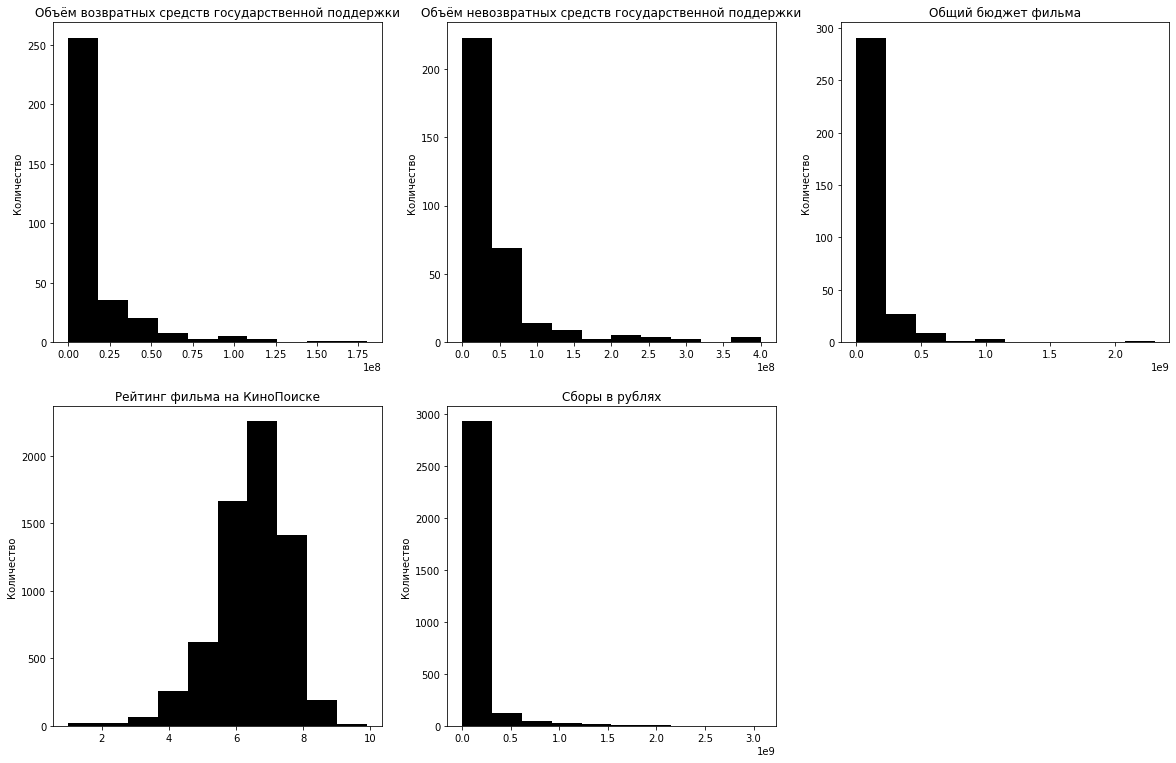

In [45]:
columns=['refundable_support', 'nonrefundable_support', 'budget', 'ratings', 'box_office']
rename_columns={'refundable_support':'Объём возвратных средств государственной поддержки', 
                'nonrefundable_support':'Объём невозвратных средств государственной поддержки', 
                'budget':'Общий бюджет фильма', 
                'ratings':'Рейтинг фильма на КиноПоиске',
                'box_office':'Сборы в рублях'}

amount = 0
plt.figure(figsize=(20,20))
for each in columns:
    amount += 1
    plt.subplot(3, 3, amount)
    plt.hist(data[each], bins=10, color='black')
    plt.title(rename_columns[each])
    plt.ylabel('Количество')    

<div class="alert alert-info">
На диаграмме "Общий бюджет фильма" есть множество данных в значении 0 хотя это общий бюджет фильма, похоже на ошибку
</div>

<div class="alert alert-info">
Посчитаем количество фильмов с бюджетом 0 рублей, но у которых есть значения в столбце <b>nonrefundable_support</b>
</div>

In [46]:
print('Количество фильмов с бюджетом 0, но с наличием объёма невозвратных средств государственной поддержки:', data[(data['nonrefundable_support'] != 0)&(data['budget']==0)]['title'].count())
print('Количество фильмов с бюджетом 0, но с наличием объёма возвратных средств государственной поддержки:', data[(data['refundable_support'] != 0)&(data['budget']==0)]['title'].count())

Количество фильмов с бюджетом 0, но с наличием объёма невозвратных средств государственной поддержки: 16
Количество фильмов с бюджетом 0, но с наличием объёма возвратных средств государственной поддержки: 10


<div class="alert alert-info">
Теперь посмотрим на этот список
</div>

In [47]:
display(data[(data['nonrefundable_support'] != 0)&(data['budget']==0)])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,"23,000,000.00",0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10"
2058,Дуxless 2,111000415,2015-01-26 12:00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"75,000,000.00",0.00,Фонд кино,6.60,драма,"446,163,511.00"
2472,Воин (2015),111017315,2015-09-28 12:00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.00","70,000,000.00",0.00,Фонд кино,7.80,"боевик,драма,криминал","196,572,438.40"
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.00","100,000,000.00",0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези","184,487,551.40"
2684,Тряпичный союз,111010215,2015-06-08 12:00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,"59,000,000.00",0.00,Фонд кино,6.30,"комедия,драма","1,957,738.51"
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"35,000,000.00",0.00,Фонд кино,5.10,"комедия,мелодрама","72,937,783.20"
2874,Помню - не помню!,111004916,2016-03-01 12:00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,"6,000,000.00",0.00,Министерство культуры,4.30,комедия,"15,362,931.43"
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000.00","51,000,000.00",0.00,Фонд кино,6.30,"комедия,мелодрама","70,299,052.00"
3565,Притяжение (2016),111018116,2016-12-16 12:00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,"250,000,000.00",0.00,Фонд кино,5.60,фантастика,"1,038,321,489.00"
3675,Чудо-юдо,114001817,2017-06-27 12:00:00,Анимационный,"ООО ""КиноФирма""",Россия,А.Лукичев,"ООО ""КиноФирма""",«6+» - для детей старше 6 лет,"20,000,000.00","20,000,000.00",0.00,Фонд кино,5.20,"мультфильм,фэнтези,семейный","55,108,014.76"


<div class="alert alert-info">
Здесь скорее всего ошибка, поэтому удалим эти записи
</div>

In [48]:
data = data[(data['nonrefundable_support'] != 0)&(data['budget']!=0)]

<div class="alert alert-info">
<b>Вывод:</b>
<br>
<b>budget</b> - это бюджет фильма. вряд ли бюджет фильма может составлять 0 рублей, даже если его снимает какой-нибудь студент в качестве дипломной работы или независимый автор - хоть какой-то бюджет у фильма должен быть. Мы определили 16 фильмов у которых бюджет составляет 0 рбулей, но при этом есть значения в столбец <b>nonrefundable_support</b>. Это сигнализирует о том, что бюджет у таких фильмов заполнен неверно. мы удалили эти записи.
<br>
<b>refundable_support</b> - это объём возвратных средств государственной поддержки. Здесь можно предположить, что при создании фильма были использованы 100% средств государственной поддержи. Поэтому значения с нулем удалять не будем.
<br>
<b>nonrefundable_support</b> - это объём возвратных средств государственной поддержки. Мы удалили записи при которых в этом столбце указан 0
<br>
<b>ratings</b> - это рейтинг фильмов. мы устранили там ошибку в некоторых данных и теперь все кажется оторажается нормально.
<br>
<b>box_office</b> - это сборы в рублях. с самого начала мы видели, что вторая таблица содержит значительно меньше записей, чем первая, поэтому логично, что данных о кассовых сборах будет меньше.
</div>

#### Шаг 2.6. Добавьте новые столбцы

- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [49]:
data['year'] = pd.DatetimeIndex(data['show_start_date']).year

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

<div class="alert alert-info">
Создадим функцию, которая вытащит первое значени до запятой в нескольких столбцах
</div>

In [50]:
def get_first_stuff(data, columns):
    for column in columns:
        data = data.copy()
        data[f'main_{column}'] = data[column].dropna().apply(lambda x: x.split(',')[0])
    return data

<div class="alert alert-info">
Применим эту функцию к столбцам: <b>director, genres, production_country</b>
</div>

In [51]:
data = get_first_stuff(data, ['director', 'genres', 'production_country'])

<div class="alert alert-info">
Посмотрим как получилось
</div>

In [52]:
display(data[['director', 'main_director', 'genres', 'main_genres', 'production_country', 'main_production_country']].head(15))

,director,main_director,genres,main_genres,production_country,main_production_country
0,Кевин Костнер,Кевин Костнер,"боевик,драма,мелодрама",боевик,США,США
1,Е.Матвеев,Е.Матвеев,"драма,военный",драма,СССР,СССР
2,Тимур Бекмамбетов,Тимур Бекмамбетов,"фантастика,боевик,триллер",фантастика,США,США
3,Тимур Бекмамбетов,Тимур Бекмамбетов,"фантастика,боевик,триллер",фантастика,США,США
4,Тимур Бекмамбетов,Тимур Бекмамбетов,"фантастика,боевик,триллер",фантастика,США,США
5,В.Абдрашитов,В.Абдрашитов,драма,драма,СССР,СССР
6,В.Меньшов,В.Меньшов,"мелодрама,комедия",мелодрама,СССР,СССР
7,Джон Туртурро,Джон Туртурро,"мюзикл,мелодрама,комедия",мюзикл,США,США
8,Эрик Беснард,Эрик Беснард,"комедия,криминал",комедия,Франция,Франция
9,В.Титов,В.Титов,"мелодрама,комедия",мелодрама,"СССР, Венгрия",СССР


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

<div class="alert alert-info">
Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.
<br>
Для этого возьмем сумму столбцов <b>refundable_support</b> и <b>nonrefundable_support</b> и разделим на значение с столбца бюджета
</div>

In [53]:
data['%_gos_support'] = (data['refundable_support'] + data['nonrefundable_support']) / data['budget']

<div class="alert alert-info">
Теперь найдем найдем среднее по столбцу <b>%_gos_support</b>
</div>

In [54]:
data['%_gos_support'].describe()

count   307.00
mean      0.52
std       0.17
min       0.04
25%       0.38
50%       0.59
75%       0.66
max       0.78
Name: %_gos_support, dtype: float64

<div class="alert alert-info">
Средняя доля гос.поддержки для фильмов составляет <b>52%</b>
</div>

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

<div class="alert alert-info">
Посчитаем количество фильмов (по годам) по которым у нас есть данные о сборах в рублях, а потом посчитаем общее количество фильмов (тоже в разбивке по годам)
<br>
А затем построим прикольный график, который я нашел по ссылке, которую мне оставил прошлый ревьюер. спасибо ему
<br>
<code>https://www.python-graph-gallery.com/</code>
</div>

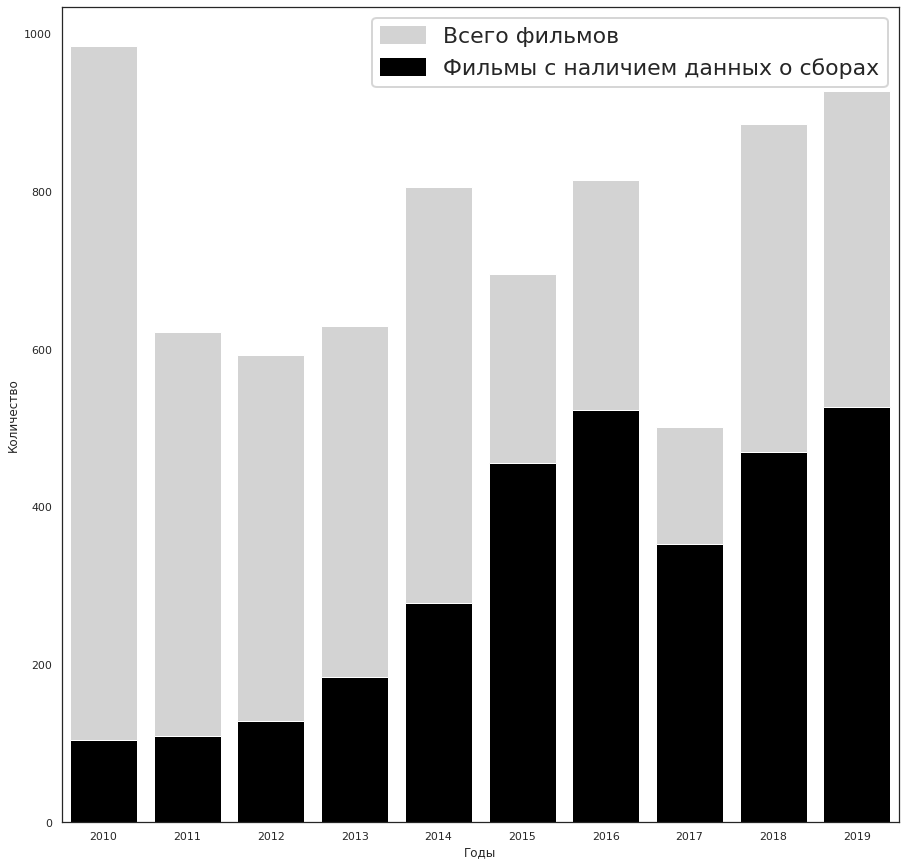

In [55]:
sb.set(style="white")
plt.figure(figsize=(15, 15))

films_with_box_office = data.groupby('year')['box_office'].count()
films_with_box_office = films_with_box_office.to_frame().reset_index()

total_films = data.groupby('year')['title'].count()
total_films = total_films.to_frame().reset_index()
total_films.rename(columns = {'title':'total_films'}, inplace = True)
total_films['box_films'] = films_with_box_office['box_office']

bar1 = sb.barplot(x = "year",  y = "total_films", data = total_films, color = 'lightgrey')
bar2 = sb.barplot(x = "year", y = "box_films", data=total_films, estimator = sum, ci = None,  color = 'black')

sb.set_context('poster', font_scale = 1)
bar1.set_xlabel('Годы')
bar1.set_ylabel('Количество')
top_bar = mpatches.Patch(color = 'lightgrey', label = 'Всего фильмов')
bottom_bar = mpatches.Patch(color = 'black', label = 'Фильмы с наличием данных о сборах')

plt.legend(handles = [top_bar, bottom_bar]);

<div class="alert alert-info">
Добавим столбец с расчетом доли фильмов в прокате
</div>

In [56]:
total_films['%_films'] = total_films['box_films'] / total_films['total_films']

In [57]:
print('Cреднее количество фильмов в год: %.0f' % total_films['total_films'].mean())
print('Cреднее количество фильмов в кинотеатрах в год: %.0f' % films_with_box_office['box_office'].mean())
temp_film_percent = total_films['%_films'].mean() * 100
print('Доля фильмов с наличием данных о прокате в кинотеатрах: %.2f' % temp_film_percent + '%')
total_films.describe()

Cреднее количество фильмов в год: 746
Cреднее количество фильмов в кинотеатрах в год: 313
Доля фильмов с наличием данных о прокате в кинотеатрах: 42.35%


,year,total_films,box_films,%_films
count,10.00,10.00,10.00,10.00
mean,"2,014.50",746.10,313.30,0.42
std,3.03,160.77,174.34,0.22
min,"2,010.00",501.00,105.00,0.11
25%,"2,012.25",624.00,142.00,0.23
50%,"2,014.50",751.00,315.50,0.44
75%,"2,016.75",868.25,466.50,0.62
max,"2,019.00",985.00,527.00,0.70


<div class="alert alert-info">
Доля фильмов с наличием данных о прокате в кинотеатрах составляет: <b>42.35%</b>
</div>

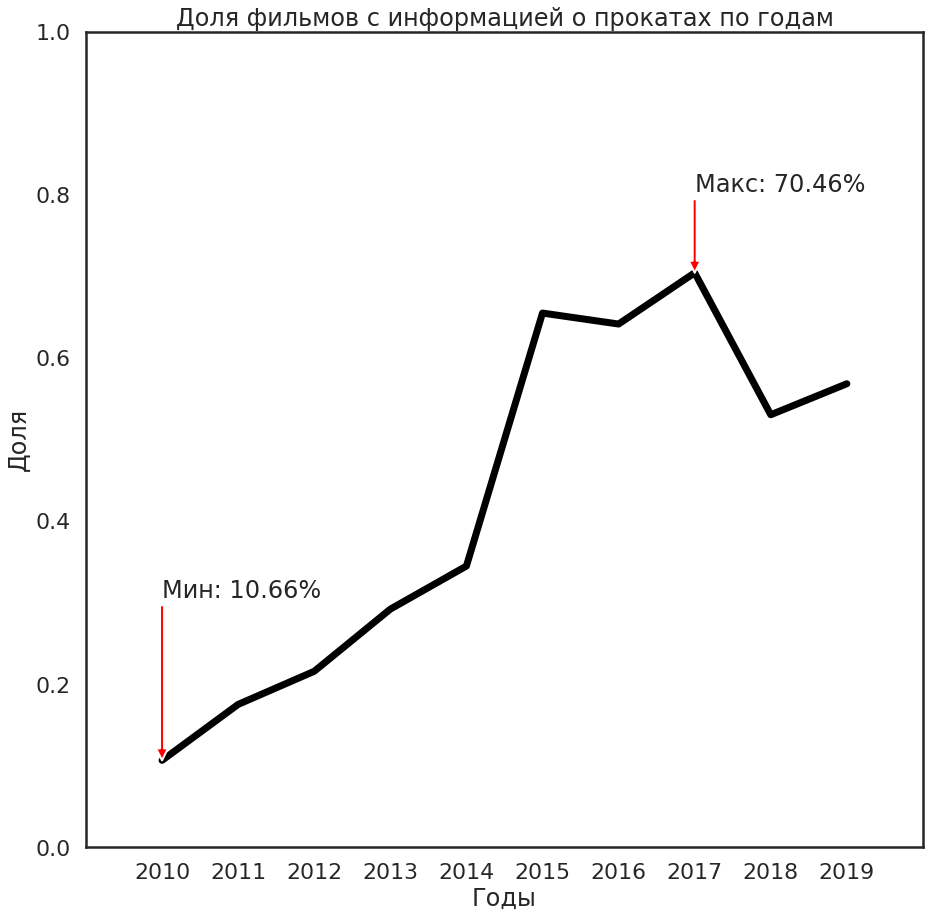

In [58]:
chart_one = total_films.plot(x='year', y='%_films', figsize = (15,15), linewidth=7, color='black', legend=None)
chart_one.set_xticks(total_films['year'])
chart_one.set_ylim(0, 1)
chart_one.set_xlim(2009, 2020)
chart_one.set_xlabel('Годы')
chart_one.set_ylabel('Доля')
chart_one.set_title('Доля фильмов с информацией о прокатах по годам')

x = np.array(total_films['year'])
y = np.array(total_films['%_films'])

ymax = max(y)
xpos = np.where(y == ymax)
xmax = x[xpos]

ymin = min(y)
xpos2 = np.where(y == ymin)
xmin = x[xpos2]

value_to_show1 = 'Макс: ' + str(round(ymax*100, 2)) + '%'
value_to_show2 = 'Мин: ' + str(round(ymin*100, 2)) + '%'
chart_one.annotate(value_to_show1, xy=(xmax, ymax), xytext=(xmax, ymax + 0.1), arrowprops=dict(facecolor='red'),)
chart_one.annotate(value_to_show2, xy=(xmin, ymin), xytext=(xmin, ymin + 0.2), arrowprops=dict(facecolor='red'),);

<div class="alert alert-info">
<b>Вывод:</b>
<br>    
Среднее количество фильмов, которые выходят в год: <b>746</b>
<br>
Среднее количество фильмов, которые выходят в кинотеатрах в год: <b>313</b>
<br>
Минимальное количество фильмов, вышедших в прокат: <b>105</b> в <b>2010</b> году
<br>
Максимальное количество фильмов, вышедших в прокат: <b>527</b> в <b>2019</b> году
<br>
Не смотря на то, что в 2017 году можно увидеть снижение общего количества фильмов, выходивших в прокат, все равно можно сказать, что с 2010 года количество фильмов постепенно увеличивается
<br>
Это говорит о том, что у людей растет спрос на подобный контент и о том, что индустрия кинематографа развивается
<br> 
Из-за небольшого уменьшения количества фильмов вышедших в прокат в 2017 году, мы видим, что доля фильмов с информацией о кассовых сборах в этом году выше всего
</div>

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

<div class="alert alert-info">
Посмотрим на кассовые сборы в разрезе разных лет
</div>

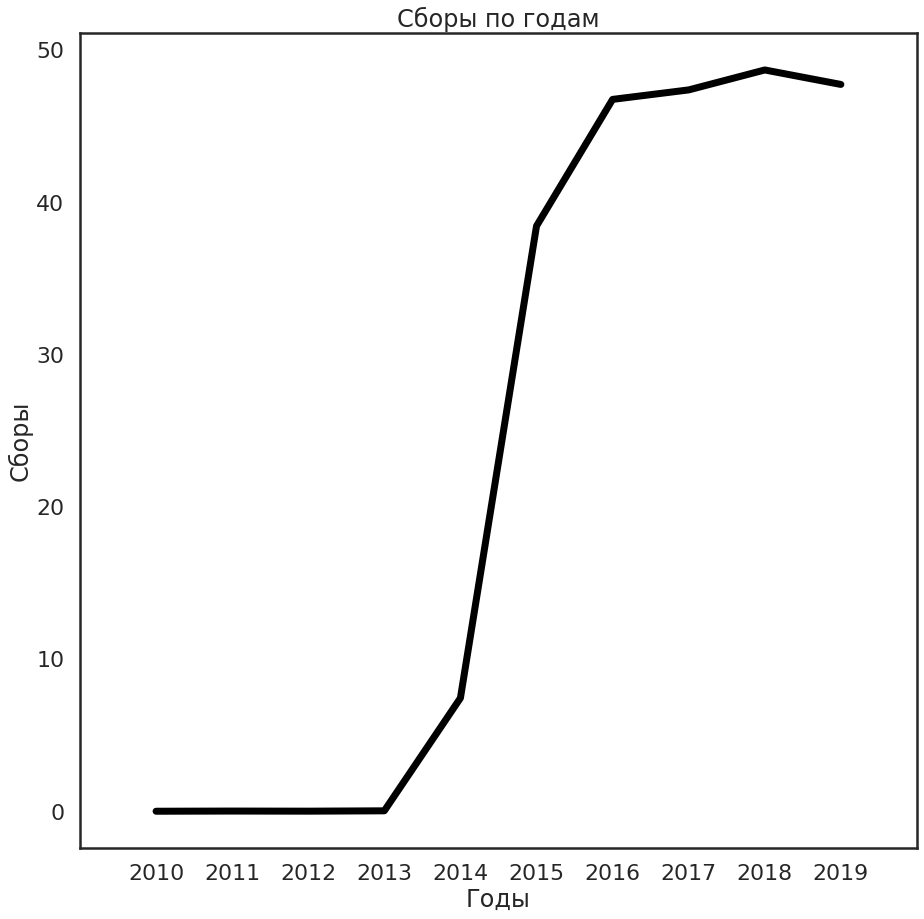

In [59]:
box_office_stuff = (
    data.pivot_table(index = 'year', values = 'box_office', aggfunc=['sum','count', 'mean', 'median'])
    .reset_index().rename(columns={'box_office':'Сборы','year':'Год','sum':'Сумма','count':'Количество', 'mean':'Среднее', 'median':'Медиана'}))

box_office_stuff['Сумма'] = box_office_stuff['Сумма'].apply(lambda x: x/10**9)

chart_two = box_office_stuff.plot(x='Год', y='Сумма', figsize = (15,15), linewidth=7, color='black', legend=None)
chart_two.set_xticks(box_office_stuff['Год'])
chart_two.set_xlim(2009, 2020)
chart_two.set_xlabel('Годы')
chart_two.set_ylabel('Сборы')
chart_two.set_title('Сборы по годам');

In [60]:
max_value = round(max(box_office_stuff['Сумма', 'Сборы']), 2)
min_value = round(min(box_office_stuff['Сумма', 'Сборы']), 4)
print('Максимальное значение:', max_value, 'В 2018 году')
print('Минимальное значение:', min_value, 'В 2010 году')

Максимальное значение: 48.67 В 2018 году
Минимальное значение: 0.0024 В 2010 году


<div class="alert alert-info">
<b>Вывод:</b>
<br>
Минимальные сборы были в <b>2010</b> году
<br>
Максимальные сборы были в <b>2018</b> году
</div>

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

,mean,median
,box_office,box_office
year,,
2010,"23,130.04","1,700.00"
2011,"129,383.17","3,000.00"
2012,"54,339.24","5,660.00"
2013,"161,954.92","3,522.50"
2014,"26,743,589.36","18,137.50"
2015,"84,270,711.60","4,742,671.67"
2016,"89,373,453.67","3,776,087.56"
2017,"134,178,224.12","9,876,765.00"


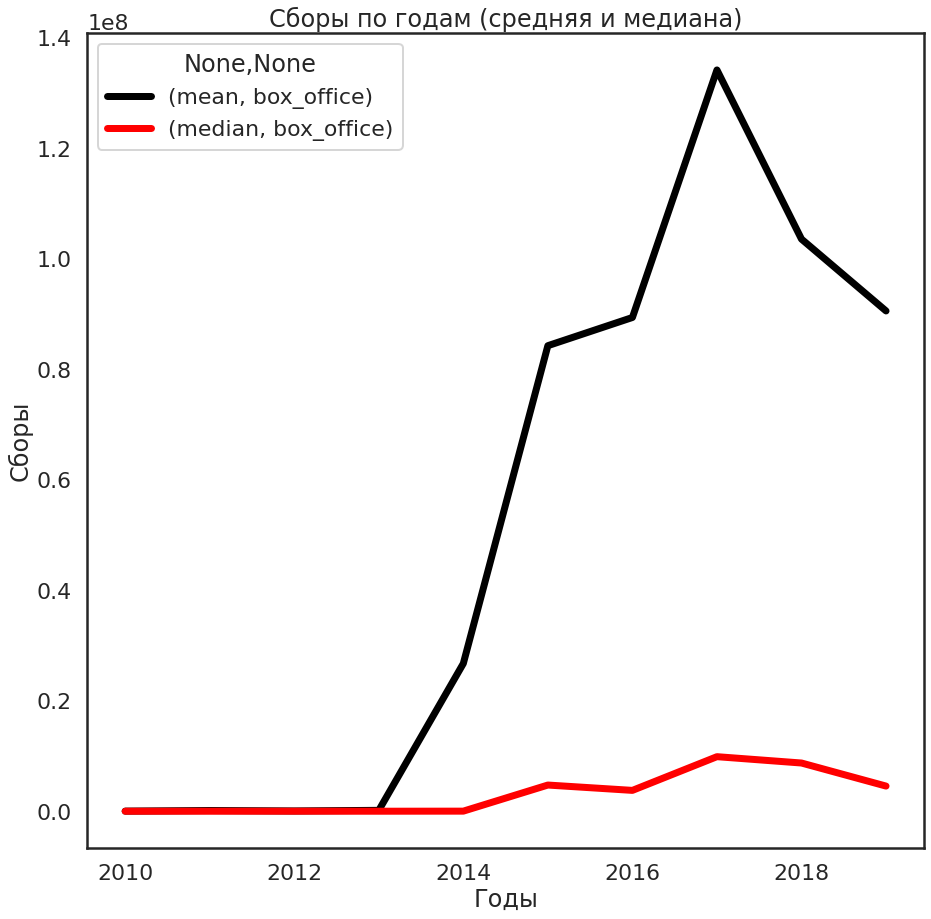

In [61]:
box_office_stuff = data.pivot_table(index = 'year', values = 'box_office', aggfunc = ['mean', 'median'])
display(box_office_stuff)

colors_for_plot = ['black', 'red']
box_office_stuff.plot(grid = False, figsize = (15, 15), linewidth = 7, color = colors_for_plot)

plt.title('Сборы по годам (средняя и медиана)')
plt.xlabel('Годы')
plt.ylabel('Сборы');

<div class="alert alert-info">
<b>Вывод:</b>
<br>
Наибольшее среднее и медиана были в <b>2017</b> году
<br>
Наименьшее среднее и медиана были в <b>2010</b> году
</div>

<div class="alert alert-info">
<font color=blue>v.2</font>
<br>
Можно также сделать вывод, что сильное отличие между графиком медианы и средней говорит о том, что в данных есть определенные выбросы, что делает показатель средней величины более волатильным
<br>
А вот по показателю медианы можно сказать, что с годами сборы находились примерно на одном уровне, может к 2017 году был небольшой рост
</div>

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

/tmp/ipykernel_31/295106483.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chart_three['box_office'] = chart_three['box_office'].apply(lambda x: x/10**9)


year,age_restriction,2015,2016,2017,2018,2019
0,«0+» - для любой зрительской аудитории,0.38,0.15,0.23,0.03,0.02
1,«12+» - для детей старше 12 лет,13.40,11.15,7.52,14.27,12.68
2,«16+» - для детей старше 16 лет,10.77,16.59,18.69,16.28,12.70
3,«18+» - запрещено для детей,5.43,6.79,9.65,8.76,10.12
4,«6+» - для детей старше 6 лет,8.45,12.05,11.27,9.34,12.20


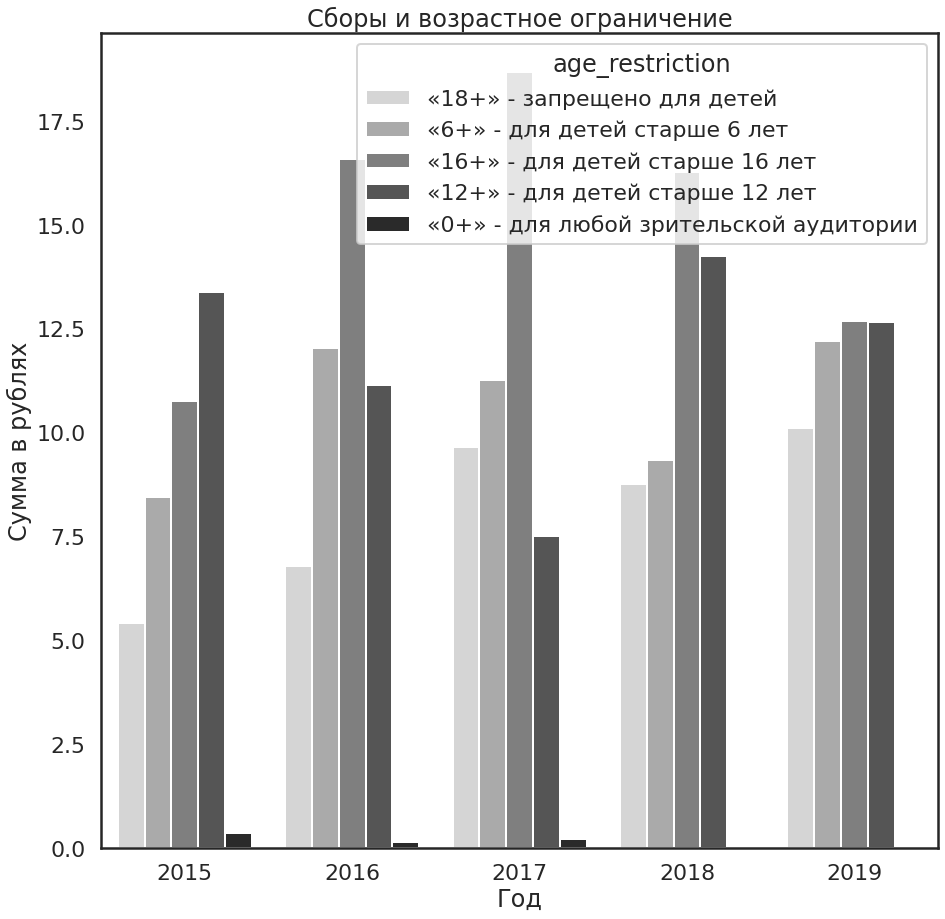

In [62]:
chart_three = data[(data['year'] >= 2015) & (data['year'] <= 2019)]
chart_three['box_office'] = chart_three['box_office'].apply(lambda x: x/10**9)
plt.figure(figsize = (15,15))
sb.barplot(x = 'year', y = 'box_office', data = chart_three, palette = 'binary', hue = 'age_restriction', ci=None, estimator = sum)
plt.title('Сборы и возрастное ограничение')  
plt.xlabel('Год')
plt.ylabel('Сумма в рублях')

check_year_cat = chart_three.pivot_table(index='age_restriction', columns='year', values='box_office', aggfunc='sum')
check_year_cat.reset_index()

In [63]:
display(check_year_cat[[2015]][check_year_cat[2015] == check_year_cat[2015].max()])
display(check_year_cat[[2016]][check_year_cat[2016] == check_year_cat[2016].max()])
display(check_year_cat[[2017]][check_year_cat[2017] == check_year_cat[2017].max()])
display(check_year_cat[[2018]][check_year_cat[2018] == check_year_cat[2018].max()])
display(check_year_cat[[2019]][check_year_cat[2019] == check_year_cat[2019].max()])

year,2015
age_restriction,
«12+» - для детей старше 12 лет,13.40


year,2016
age_restriction,
«16+» - для детей старше 16 лет,16.59


year,2017
age_restriction,
«16+» - для детей старше 16 лет,18.69


year,2018
age_restriction,
«16+» - для детей старше 16 лет,16.28


year,2019
age_restriction,
«16+» - для детей старше 16 лет,12.70


<div class="alert alert-info">
<b>Вывод:</b>
<br>
Большей популярностью пользуются фильмы категории <b>16+</b>
<br>
Что касается сборов в рублях, то в 2015 году категория <b>12+</b> была на первом месте, но в остальных случаях на первом месте категория <b>16+</b>
</div>

<div class="alert alert-info">
Топ 10 фильмов категории <b>16+</b>
</div>

In [64]:
top_10_16plus = data[(data['age_restriction'] == '«16+» - для детей старше 16 лет') & (data['box_office'].notna())]

(
    top_10_16plus.pivot_table(index = 'title', values = 'box_office', aggfunc='sum')
    .sort_values(by='box_office', ascending=False)
    .reset_index().rename(columns={'box_office':'Сборы в руб.', 'title':'Название фильма'})
)
box_office_stuff.head(10)

,mean,median
,box_office,box_office
year,,
2010,"23,130.04","1,700.00"
2011,"129,383.17","3,000.00"
2012,"54,339.24","5,660.00"
2013,"161,954.92","3,522.50"
2014,"26,743,589.36","18,137.50"
2015,"84,270,711.60","4,742,671.67"
2016,"89,373,453.67","3,776,087.56"
2017,"134,178,224.12","9,876,765.00"


<div class="alert alert-info">
<b>Вывод:</b>
<br>
Исходя из сведений списка топ 10 фильмов из категории <b>16+</b> можно сделать следующий вывод:
<br>
На первом месте - <b>Мстители: Финал</b>
<br>
На втором месте - <b>Пираты Карибского моря: Мертвецы не рассказывают сказки</b>
<br>
На третьем месте - <b>Веном</b>
<br>
Хорошие фильмы
</div>

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

<div class="alert alert-info">
Создадим таблицу только с фильмами с гос.поддержкой
</div>

In [65]:
gos_podderjka = data.query('nonrefundable_support > 0 or refundable_support > 0')

<div class="alert alert-info">
Посмотрим сколько фильмов с гос.поддержкой в разных возрастных категориях
</div>

/tmp/ipykernel_31/4151322256.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gos_podderjka['gos_babki'] = gos_podderjka['nonrefundable_support'] + gos_podderjka['nonrefundable_support']


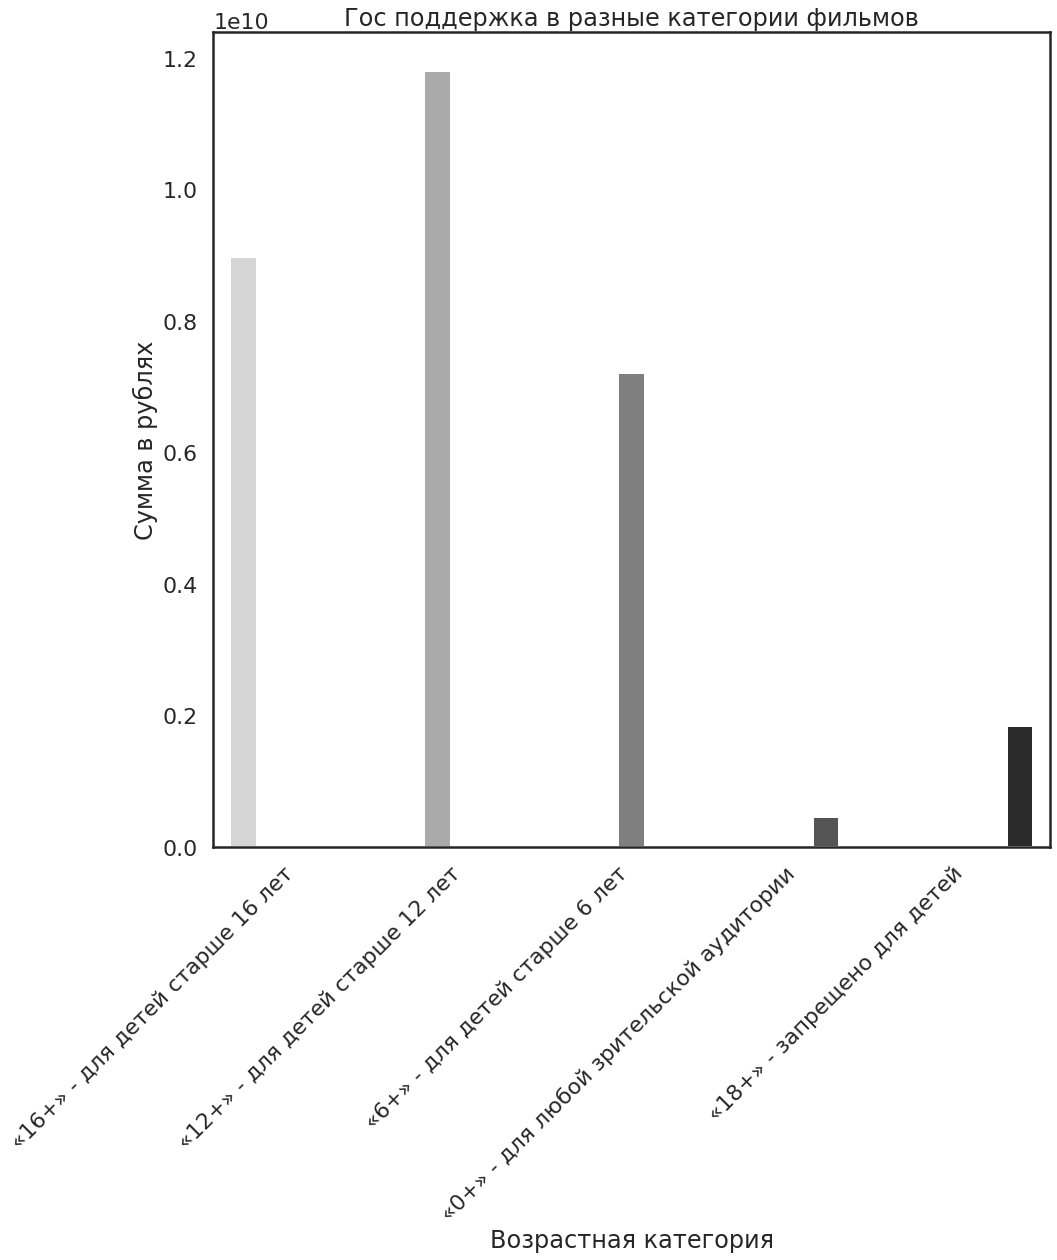

In [66]:
gos_podderjka['gos_babki'] = gos_podderjka['nonrefundable_support'] + gos_podderjka['nonrefundable_support']
plt.figure(figsize = (15,15))
sb.barplot(x = 'age_restriction', y = 'gos_babki', data = gos_podderjka, palette = 'binary', hue = 'age_restriction', ci=None, estimator = sum).get_legend().set_visible(False)
plt.title('Гос поддержка в разные категории фильмов')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Возрастная категория')
plt.ylabel('Сумма в рублях');

In [67]:
(
    gos_podderjka.pivot_table(index = 'age_restriction', values = 'gos_babki', aggfunc='sum')
    .sort_values(by='gos_babki', ascending=False)
    .reset_index().rename(columns={'gos_babki':'Гос. поддержка', 'age_restriction':'Возрастная категория'})
)

,Возрастная категория,Гос. поддержка
0,«12+» - для детей старше 12 лет,"11,811,788,330.00"
1,«16+» - для детей старше 16 лет,"8,979,800,400.00"
2,«6+» - для детей старше 6 лет,"7,216,808,964.00"
3,«18+» - запрещено для детей,"1,842,000,000.00"
4,«0+» - для любой зрительской аудитории,"457,040,000.00"


<div class="alert alert-info">
Теперь посмотрим сколько фильмов было выпущено в каждой из категорий
</div>

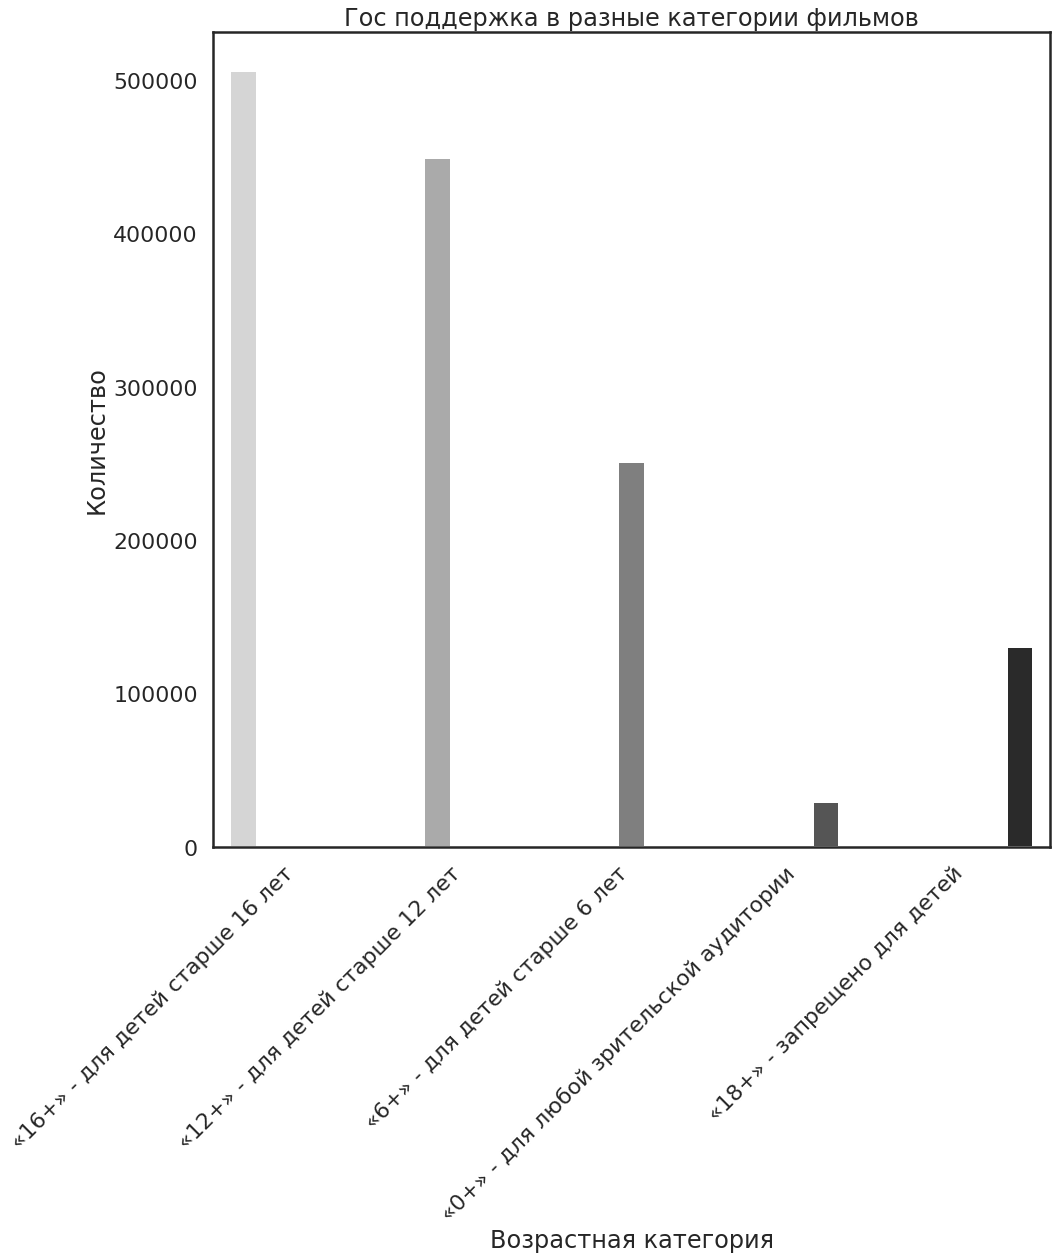

In [68]:
plt.figure(figsize = (15,15))
sb.barplot(x = 'age_restriction', y = gos_podderjka.index, data = gos_podderjka, palette = 'binary', hue = 'age_restriction', ci=None, estimator = sum).get_legend().set_visible(False)
plt.title('Гос поддержка в разные категории фильмов')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Возрастная категория')
plt.ylabel('Количество');

In [69]:
(
    gos_podderjka.pivot_table(index = 'age_restriction', values = 'gos_babki', aggfunc='count')
    .sort_values(by='gos_babki', ascending=False)
    .reset_index().rename(columns={'gos_babki':'Кол-во Гос. поддержка', 'age_restriction':'Возрастная категория'})
)

,Возрастная категория,Кол-во Гос. поддержка
0,«16+» - для детей старше 16 лет,116
1,«12+» - для детей старше 12 лет,101
2,«6+» - для детей старше 6 лет,55
3,«18+» - запрещено для детей,27
4,«0+» - для любой зрительской аудитории,8


<div class="alert alert-info">
<b>Вывод:</b>
<br>
Исходя из графика, наиболее спонсируемая гос.поддержкой категория фильмов (с точки зрения финансирования) - <b>«12+»</b>
<br>
Так же можно заметить, что наибольшее количество фильмов спонсируемых с гос.поддержкой фильмов (с точки зрения количества) - <b>«16+»</b>
</div>

<div class="alert alert-info">
Посмотрим теперь в каком году больше всего было выделено средств гос.поддержки
</div>

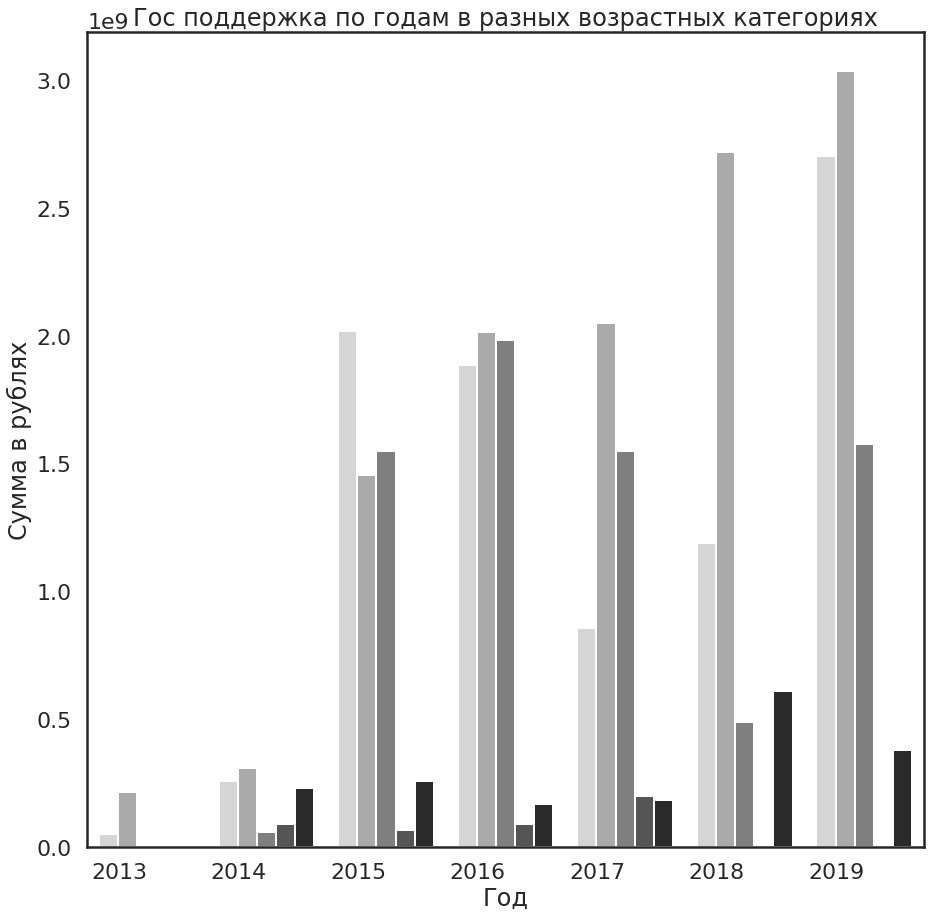

In [70]:
plt.figure(figsize = (15,15))
sb.barplot(x = 'year', y = 'gos_babki', data = gos_podderjka, palette = 'binary', hue = 'age_restriction', ci=None, estimator = sum).get_legend().set_visible(False)
plt.title('Гос поддержка по годам в разных возрастных категориях')
plt.xticks(ha='right')
plt.xlabel('Год')
plt.ylabel('Сумма в рублях');

In [71]:
(
    gos_podderjka.pivot_table(index = 'year', values = 'gos_babki', aggfunc='sum')
    .sort_values(by='gos_babki', ascending=False)
    .reset_index().rename(columns={'gos_babki':'Гос. поддержка', 'year':'Год'})
)

,Год,Гос. поддержка
0,2019,"7,712,000,000.00"
1,2016,"6,149,310,964.00"
2,2015,"5,360,176,680.00"
3,2018,"5,012,000,000.00"
4,2017,"4,849,249,562.00"
5,2014,"956,004,598.00"
6,2013,"268,695,890.00"


<div class="alert alert-info">
Теперь посмотрим сколько фильмов было выпущено с помощью гос.поддержки за каждый год
</div>

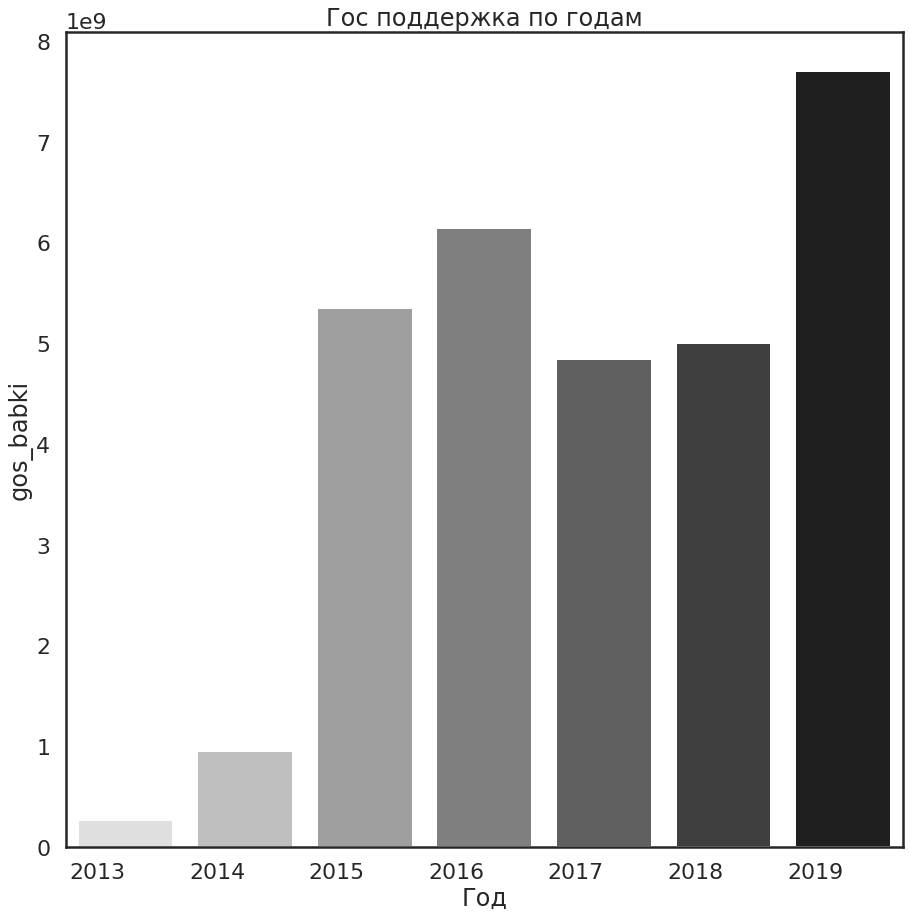

In [72]:
plt.figure(figsize = (15,15))
sb.barplot(x = 'year', y = 'gos_babki', data = gos_podderjka, palette = 'binary', ci=None, estimator = sum).get_legend()
plt.title('Гос поддержка по годам')
plt.xticks(ha='right')
plt.xlabel('Год');

In [73]:
(
    gos_podderjka.pivot_table(index = 'year', values = 'gos_babki', aggfunc='count')
    .sort_values(by='gos_babki', ascending=False)
    .reset_index().rename(columns={'gos_babki':'Гос. поддержка', 'year':'Год'})
)

,Год,Гос. поддержка
0,2015,77
1,2019,67
2,2016,58
3,2018,51
4,2017,37
5,2014,15
6,2013,2


<div class="alert alert-info">
<b>Вывод:</b>
<br>
Можно сделать вывод, что с 2013 года значительно увеличивается уровень гос.поддержки кинематографа
</div>

<div class="alert alert-info">
Теперь найдем фильм на который было выделено больше всего средств гос.поддержки
</div>

In [74]:
display(gos_podderjka[['title', 'year', 'gos_babki']][gos_podderjka['gos_babki'] == gos_podderjka['gos_babki'].max()])

,title,year,gos_babki
5653,Движение вверх,2017,"800,000,000.00"
7464,Союз спасения,2019,"800,000,000.00"
7474,Вторжение,2019,"800,000,000.00"


<div class="alert alert-info">
<font color=blue>v.2</font>
<br>
Итак, можно сказать, что в 2019 году на два фильма (<b>Союз спасения</b> и <b>Вторжение</b>) было выделено столько же средств, что и в 2017 году на фильм <b>Движение вверх</b> эти три фильма являются лидерами по количеству сборов средств гос.поддержки
</div>

<div class="alert alert-info">
Посмотрим теперь какие жанры фильмов чаще всего получают гос.поддержку
</div>

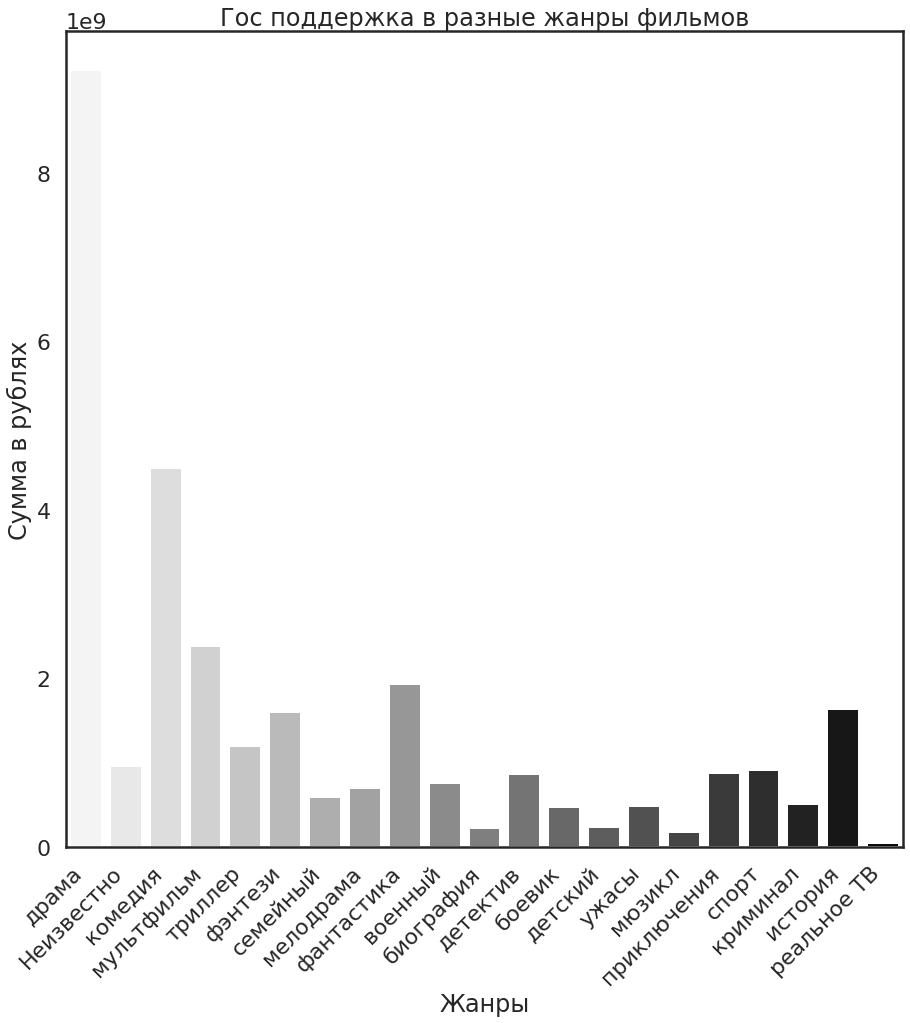

In [75]:
plt.figure(figsize = (15,15))
sb.barplot(x = 'main_genres', y = 'gos_babki', data = gos_podderjka, palette = 'binary', ci=None, estimator = sum)
plt.title('Гос поддержка в разные жанры фильмов')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Жанры')
plt.ylabel('Сумма в рублях');

In [76]:
(
    gos_podderjka.pivot_table(index = 'main_genres', values = 'gos_babki', aggfunc='sum')
    .sort_values(by='gos_babki', ascending=False)
    .reset_index().rename(columns={'gos_babki':'Гос. поддержка', 'main_genres':'Жанры'})
)

,Жанры,Гос. поддержка
0,драма,"9,222,119,502.00"
1,комедия,"4,501,565,890.00"
2,мультфильм,"2,383,040,000.00"
3,фантастика,"1,932,000,000.00"
4,история,"1,640,000,000.00"
5,фэнтези,"1,599,800,000.00"
6,триллер,"1,199,290,570.00"
7,Неизвестно,"960,000,000.00"
8,спорт,"910,000,000.00"
9,приключения,"882,000,000.00"


<div class="alert alert-info">
Теперь посмотрим на жанры по количественному признаку
</div>

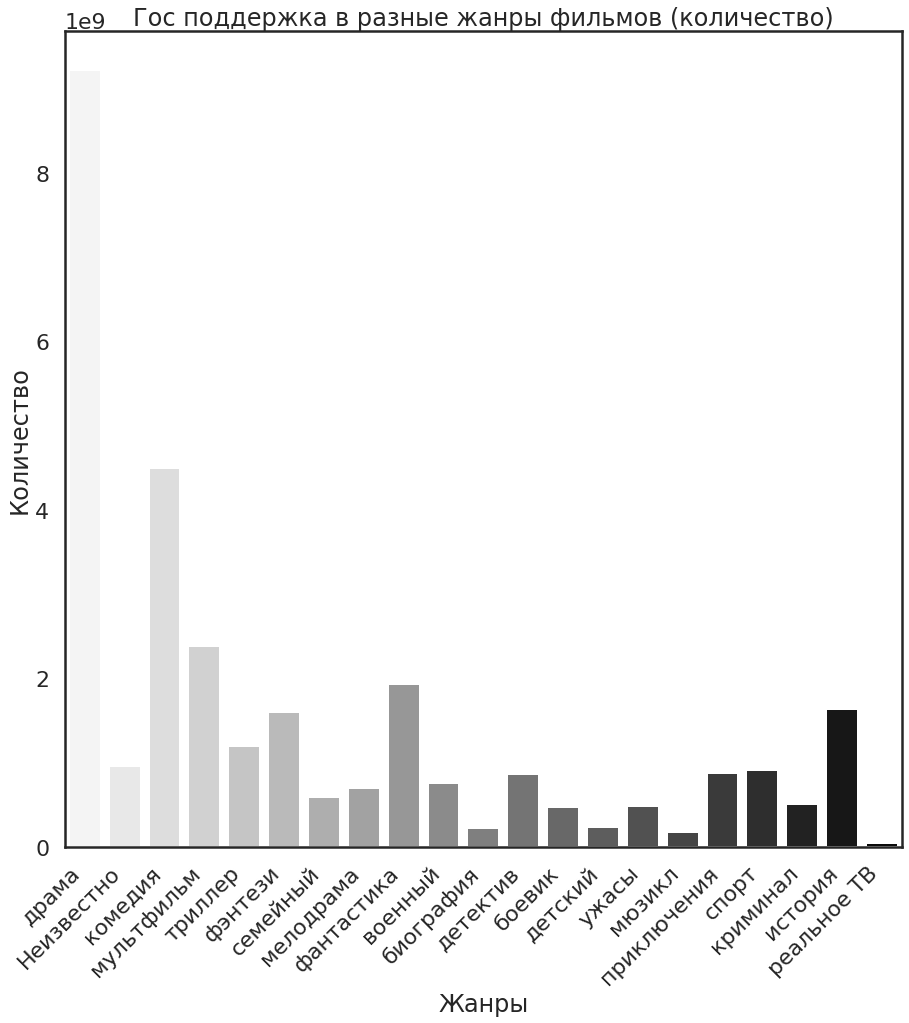

In [77]:
plt.figure(figsize = (15,15))
sb.barplot(x = 'main_genres', y = 'gos_babki', data = gos_podderjka, palette = 'binary', ci=None, estimator = sum)
plt.title('Гос поддержка в разные жанры фильмов (количество)')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Жанры')
plt.ylabel('Количество');

In [78]:
(
    gos_podderjka.pivot_table(index = 'main_genres', values = 'gos_babki', aggfunc='count')
    .sort_values(by='gos_babki', ascending=False)
    .reset_index().rename(columns={'gos_babki':'Гос. поддержка', 'main_genres':'Жанры'})
)

,Жанры,Гос. поддержка
0,драма,92
1,комедия,66
2,мультфильм,22
3,Неизвестно,15
4,триллер,14
5,мелодрама,13
6,фэнтези,11
7,фантастика,10
8,военный,9
9,ужасы,9


<div class="alert alert-info">
Драмы прям выбиваются по суммам гос.поддержки, а также по количеству релизных фильмов
<br>
на втором месте комедии и потом мультфильмы
</div>

### Шаг 5. Напишите общий вывод

<div class="alert alert-info">
В данном проекте на предлагалось два датасета с данными
<br>
Первый это данные о прокатных удостоверениях.
<br>
Второй это данные о прокате в российских кинотеатрах.
<br>
мы соединили два этих датасета по общему ключу <b>puNumber</b> и провели предварительную оценку и далее - предоработку данных, а именно:
<br>
-нашли дубликаты и исправили их
<br>
-провели просмотр пустых значений, там где могли - заменили пустые значения на логически подходящие
<br>
-провели работу над ошибками, исправили недочеты и устранили артефакты (вроде рейтинга в виде процентов), а также унификацию категориальных значений
<br>
Нам удалось выделить из множества данных определенные закономерности, а также добавили для удобства дополнительные столбцы
<br>
Мы также изучили и количетсвенные значения
<br>
После преведения общего пула данных удобоворимый вид мы провели аналитическую работу относительно имеющихся данных
<br>
Построили крутые и красивые графики и выделили следующие интересные факты:
<br>
<br>
Мы определили, что самая распространенная возрастная категория это <b>16+</b>
<br>
Cреднее количество фильмов в год: <b>746</b>
<br>
Cреднее количество фильмов в кинотеатрах в год: <b>313</b>
<br>
Доля фильмов с наличием данных о прокате в кинотеатрах: <b>42.35%</b>
<br>
Минимальное количество фильмов, вышедших в прокат: <b>105 в 2010 году</b>
<br>
Максимальное количество фильмов, вышедших в прокат: <b>527 в 2019 году</b>
<br>
Драмы прям выбиваются по суммам гос.поддержки, а также по количеству релизных фильмов
<br>
на втором месте комедии и потом мультфильмы
</div>